In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf

In [0]:
DATASET_PATH ='/content/gdrive/My Drive/Covid19Pics/Covid_Data_GradientCrescent/all/train' #'D:\\ProjectCovid19\\Covid_Data_GradientCrescent\\two\\train'
test_dir = '/content/gdrive/My Drive/Covid19Pics/Covid_Data_GradientCrescent/all/test'#'D:\\ProjectCovid19\\Covid_Data_GradientCrescent\\two\\test'

In [0]:
IMAGE_SIZE = (150,150)
BATCH_SIZE = 10
NUM_EPOCHS = 100
LEARNING_RATE =1E-4

In [8]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode='constant')



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [10]:
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="categorical",
 )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="categorical",
 )

Found 224 images belonging to 4 classes.
Found 55 images belonging to 4 classes.


In [0]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.backend import sigmoid
def swish(x, beta = 1):
  return (x * sigmoid(beta * x))
from tensorflow.keras.layers import BatchNormalization

In [0]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [15]:
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(150,150, 3))
conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='swish'))
model.add(layers.Dense(1024, activation='swish'))
model.add(layers.Dense(256, activation='swish'))
model.add(layers.Dense(4, activation="softmax"))

model.compile(loss='categorical_crossentropy',
 
 optimizer=optimizers.Adam(lr=LEARNING_RATE),
 metrics=['accuracy'])

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history=model.fit_generator(train_batches,
 steps_per_epoch =STEP_SIZE_TRAIN,
 validation_data = valid_batches,
 validation_steps = STEP_SIZE_VALID,
 epochs= NUM_EPOCHS,
 )

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


22/22 [==============================] - 5s 244ms/step - loss: 1.4047 - accuracy: 0.2818 - val_loss: 1.4070 - val_accuracy: 0.2800
Epoch 2/100
22/22 [==============================] - 5s 236ms/step - loss: 1.2891 - accuracy: 0.3750 - val_loss: 1.2843 - val_accuracy: 0.5556
Epoch 3/100
22/22 [==============================] - 5s 226ms/step - loss: 1.1121 - accuracy: 0.5467 - val_loss: 0.9840 - val_accuracy: 0.6222
Epoch 4/100
22/22 [==============================] - 5s 221ms/step - loss: 1.0313 - accuracy: 0.5093 - val_loss: 1.0758 - val_accuracy: 0.4667
Epoch 5/100
22/22 [==============================] - 5s 222ms/step - loss: 0.9430 - accuracy: 0.5467 - val_loss: 0.9357 - val_accuracy: 0.5333
Epoch 6/100
22/22 [==============================] - 4s 196ms/step - loss: 0.8541 - accuracy: 0.6121 - val_loss: 0.3470 - val_accuracy: 0.6000
Epoch 7/100
22/22 [==============================] - 5s 240ms/step - loss: 0.9259 - accuracy: 0.5727 - val_loss: 0.7645 - val_accuracy: 0.6600
Epoch 8/100

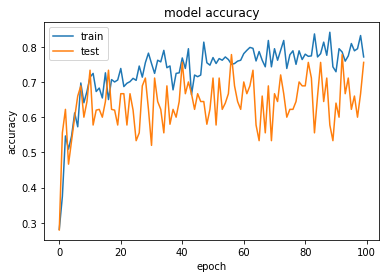

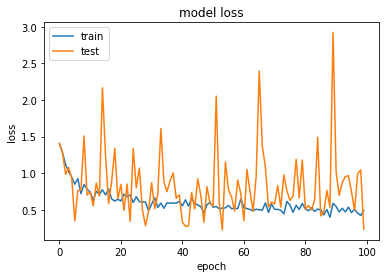

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(
 test_dir,target_size=IMAGE_SIZE,
 batch_size=1,
 shuffle=False,
 seed=42,
 class_mode="categorical")

eval_generator.reset()
x = model.evaluate_generator(eval_generator,
 steps = np.ceil(len(eval_generator) / BATCH_SIZE),
 use_multiprocessing = False,
 verbose = 1,
 workers=1
 )
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
4/4 [==============================] - 1s 288ms/step
Test loss: 0.0004213160718791187
Test accuracy: 1.0
